In [1]:
import numpy as np
import freegs
from freegs.plotting import plotConstraints
from freegs.critical import find_critical
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import sys
import matplotlib.pyplot as plt
from copy import deepcopy
from IPython.display import display, clear_output
import time

%load_ext autoreload
%autoreload 2

In [2]:
# import pickle
# with open('../freegsnke/Fiesta_full_passive.pk', 'rb') as f:
#     data = pickle.load(f)
# passive_coils = []
# # R, Z, dR, dZ, resistivity
# for l in data[0]:
#     passive_coils.append({
#         "R": l[0],
#         "Z": l[1],
#         "dR": l[2],
#         "dZ": l[3],
#         "resistivity": l[4]
#     })

# pickle.dump(passive_coils, open("passive_coils.pk", "wb"))


In [3]:
# rwall = [1.56442 , 1.73298 , 1.34848 , 1.0882  , 0.902253, 0.903669,
#     0.533866, 0.538011, 0.332797, 0.332797, 0.334796, 0.303115,
#     0.305114, 0.269136, 0.271135, 0.260841, 0.260841, 0.271135,
#     0.269136, 0.305114, 0.303115, 0.334796, 0.332797, 0.332797,
#     0.538598, 0.534469, 0.90563 , 0.904219, 1.0882  , 1.34848 ,
#     1.73018 , 1.56442 , 1.37999 , 1.37989 , 1.19622 , 1.19632 ,
#     1.05537 , 1.05528 , 0.947502, 0.905686, 0.899143, 0.883388,
#     0.867681, 0.851322, 0.833482, 0.826063, 0.822678, 0.821023,
#     0.820691, 0.822887, 0.827573, 0.839195, 0.855244, 0.877567,
#     0.899473, 1.18568 , 1.279   , 1.296   , 1.521   , 1.521   ,
#     1.8     , 1.8     , 1.521   , 1.521   , 1.296   , 1.279   ,
#     1.18568 , 0.899473, 0.877567, 0.855244, 0.839195, 0.827573,
#     0.822887, 0.820691, 0.821023, 0.822678, 0.826063, 0.833482,
#     0.851322, 0.867681, 0.883388, 0.899143, 0.905686, 0.947502,
#     1.05528 , 1.05537 , 1.19632 , 1.19622 , 1.37989 , 1.37999 ,
#     1.56442 ]

# zwall = [ 1.56424 ,  1.67902 ,  2.06041 ,  2.05946 ,  1.87565 ,  1.87424 ,
#     1.50286 ,  1.49874 ,  1.29709 ,  1.094   ,  1.094   ,  0.8475  ,
#     0.8475  ,  0.565   ,  0.565   ,  0.495258, -0.507258, -0.577   ,
#     -0.577   , -0.8595  , -0.8595  , -1.106   , -1.106   , -1.30909 ,
#     -1.5099  , -1.51403 , -1.88406 , -1.88547 , -2.06614 , -2.06519 ,
#     -1.68099 , -1.56884 , -1.57688 , -1.57673 , -1.58475 , -1.5849  ,
#     -1.59105 , -1.59091 , -1.59561 , -1.59556 , -1.59478 , -1.59026 ,
#     -1.58087 , -1.56767 , -1.54624 , -1.52875 , -1.51517 , -1.49624 ,
#     -1.47724 , -1.44582 , -1.41923 , -1.38728 , -1.35284 , -1.3221  ,
#     -1.30018 , -1.0138  , -0.8423  , -0.8202  , -0.8202  , -0.25    ,
#     -0.25    ,  0.25    ,  0.25    ,  0.8156  ,  0.8156  ,  0.8377  ,
#     1.0092  ,  1.29558 ,  1.3175  ,  1.34824 ,  1.38268 ,  1.41463 ,
#     1.44122 ,  1.47264 ,  1.49164 ,  1.51057 ,  1.52415 ,  1.54164 ,
#     1.56307 ,  1.57627 ,  1.58566 ,  1.59018 ,  1.59096 ,  1.59101 ,
#     1.58631 ,  1.58645 ,  1.5803  ,  1.58015 ,  1.57213 ,  1.57228 ,
#     1.56424 ]

# wall = []
# for i in range(len(rwall)):
#     wall.append({"R": rwall[i], "Z": zwall[i]})

# pickle.dump(wall, open("wall.pk", "wb"))

In [4]:
# with open('../machine_configs/MAST-U/passive_coils.pk', 'rb') as f:
#     passive_coils = pickle.load(f)
# passive_coils

In [5]:
# with open('../machine_configs/MAST-U/active_coils.pkl', 'rb') as f:
#     active_coils = pickle.load(f)
# active_coils

In [6]:
# %matplotlib notebook

In [2]:
# Create the machine, which specifies coil locations
# and equilibrium, specifying the domain to solve over
# this has to be either
# freegs.machine.MASTU(), in which case:
#tokamak = freegs.machine.MASTU()
# or
# MASTU_coils.MASTU_wpass()
import os
os.environ["ACTIVE_COILS_PATH"] = "../machine_configs/MAST-U/active_coils.pickle"
os.environ["PASSIVE_COILS_PATH"] = "../machine_configs/MAST-U/passive_coils.pickle"
os.environ["WALL_PATH"] = "../machine_configs/MAST-U/wall.pickle"

from freegsnke import machine_config
from freegsnke import build_machine
from freegsnke import faster_shape

tokamak = build_machine.tokamak()


# Creates equilibrium object and initializes it with 
# a "good" solution
# plasma_psi = np.loadtxt('plasma_psi_example.txt')
eq = freegs.Equilibrium(tokamak=tokamak,
                        #domains can be changed 
                        Rmin=0.1, Rmax=2.0,    # Radial domain
                        Zmin=-2.2, Zmax=2.2,   # Height range
                        #grid resolution can be changed
                        nx=65, ny=129, # Number of grid points
                        # psi=plasma_psi[::2,:])   
                        )  

from freegsnke import GSstaticsolver
NK = GSstaticsolver.NKGSsolver(eq)

In [3]:
from freegsnke import plasma_grids
grids = plasma_grids.Grids(eq, None)

In [13]:

# Sets desired plasma properties for the 'starting equilibrium'
# values can be changed
from freegsnke.jtor_update import ConstrainPaxisIp
profiles = ConstrainPaxisIp(grids.plasma_domain_mask,
                            8.1e3, # Plasma pressure on axis [Pascals]
                            6.2e5, # Plasma current [Amps]
                            0.5, # vacuum f = R*Bt
                            alpha_m = 1.8,
                            alpha_n = 1.2)


# Sets some shape constraints (here very close to those used for initialization)
Rx = 0.5
Zx = 1.15

Rmid = 1.41   # Outboard midplane
Rin = 0.25  # Inboard midplane

xpoints = [(Rx, -Zx-.01),   # (R,Z) locations of X-points
           (Rx,  Zx)]
isoflux = [
           (Rx,Zx, Rx,-Zx),
           (Rmid, 0, Rin, 0.0),
           (Rmid,0, Rx,Zx),
    
           # Link inner and outer midplane locations
           (Rx, Zx, .85, 1.7),
           (Rx, Zx, .75, 1.6),
           (Rx, Zx, Rin, 0.2),
           (Rx, Zx, Rin, 0.1),
           (Rx,-Zx, Rin, -0.1),
           (Rx,-Zx, Rin, -0.2),
           (Rx,-Zx, .85, -1.7),
           (Rx,-Zx, .75, -1.6),

           (Rx,-Zx, 0.45, -1.8),
           (Rx, Zx, 0.45,  1.8),
           ]

eq.tokamak['P6'].current = 0
eq.tokamak['P6'].control = False
eq.tokamak['Solenoid'].control = False

constrain = freegs.control.constrain(xpoints=xpoints, 
                                     gamma=5e-6, 
                                     isoflux=isoflux
                                    )
constrain(eq)
                                    


In [5]:
currents = np.array(
        [
            4.00000000e04,
            4.66888649e03,
            1.18887128e04,
            1.09099021e04,
            7.76454625e03,
            -4.25085229e03,
            1.29072804e03,
            4.61377534e02,
            1.12340825e01,
            -2.79838121e03,
            -4.05265744e03,
            0.00000000e00,
        ]
    )
keys = list(eq.tokamak.getCurrents().keys())
for i in np.arange(12):
    eq.tokamak[keys[i]].current = currents[i]

In [20]:
eq.tokamak['P6'].current = 0
eq.tokamak['P6'].control = False
eq.tokamak['Solenoid'].control = False
eq.tokamak['Solenoid'].current = 15000
# Nonlinear solve
freegs.solve(eq,          # The equilibrium to adjust
             profiles,    # The plasma profiles
             constrain,   # Plasma control constraints
             show=False,
             rtol=3e-3)

Text(0.5, 1.0, 'q profile')

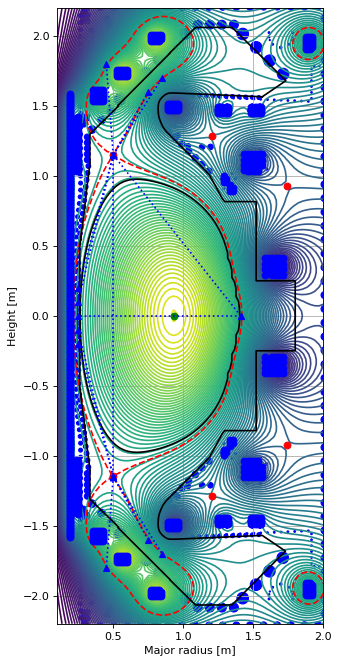

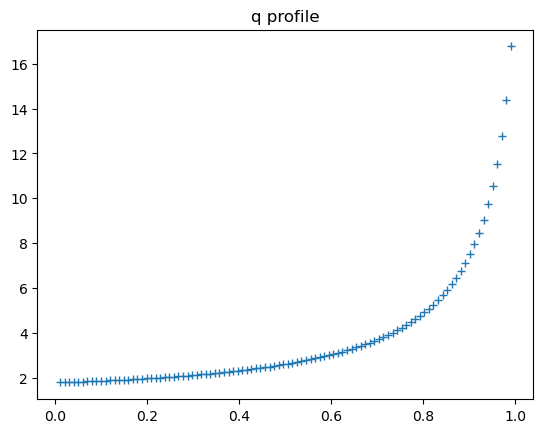

In [14]:
eq.tokamak['P6'].current = 0
eq.tokamak['P6'].control = False
eq.tokamak['Solenoid'].control = False
eq.tokamak['Solenoid'].current = 15000
# Nonlinear solve
freegs.solve(eq,          # The equilibrium to adjust
             profiles,    # The plasma profiles
             constrain,   # Plasma control constraints
             show=False,
             rtol=3e-3)               
eq.tokamak['Solenoid'].current = 40000
freegs.solve(eq,          # The equilibrium to adjust
             profiles,    # The plasma profiles
             constrain,   # Plasma control constraints
             show=False,
             rtol=3e-3)  
NK.solve(eq, profiles, target_relative_tolerance=1e-8)
fig = plt.figure(figsize=(5, 10), dpi=80);
ax = fig.add_subplot(111);
ax.grid(True,which='both');
eq.plot(axis=ax,show=False);
eq.tokamak.plot(axis=ax,show=False);
constrain.plot(axis=ax,show=False)

qprof = eq.q()
plt.figure()
plt.plot(qprof[0], qprof[1], '+')
plt.title('q profile')

<AxesSubplot:xlabel='Major radius [m]', ylabel='Height [m]'>

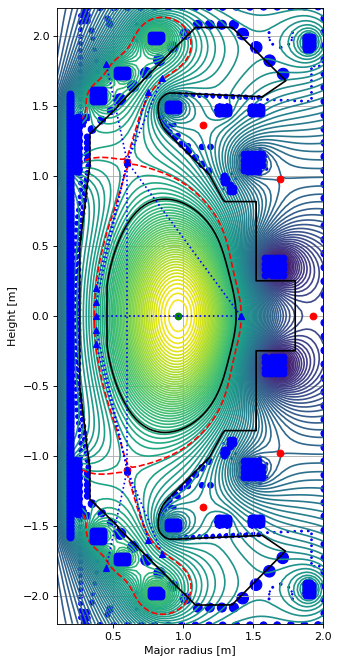

In [21]:
fig = plt.figure(figsize=(5, 10), dpi=80);
ax = fig.add_subplot(111);
ax.grid(True,which='both');
eq.plot(axis=ax,show=False);
eq.tokamak.plot(axis=ax,show=False);
constrain.plot(axis=ax,show=False)

In [10]:
jtor = profiles.Jtor(eq.R, eq.Z, psi, psi_bndry=None)

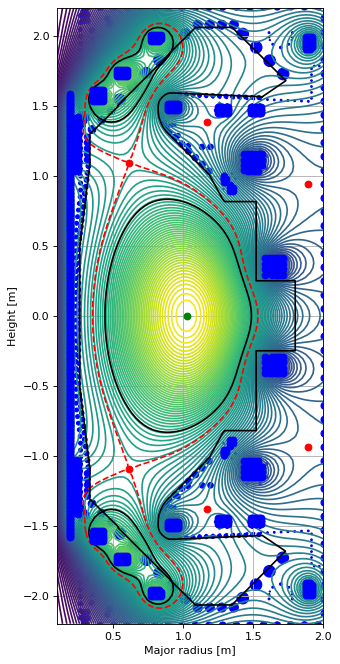

In [10]:
NK.solve(eq, profiles, target_relative_tolerance=1e-8)
fig = plt.figure(figsize=(5, 10), dpi=80);
ax = fig.add_subplot(111);
ax.grid(True,which='both');
eq.plot(axis=ax,show=False);
eq.tokamak.plot(axis=ax,show=False);

In [13]:
from freegs import critical

In [17]:
opt, xpt = critical.fastcrit(eq.R, eq.Z, psi)

In [24]:
profiles.Jtor_part1(eq.R, eq.Z, psi)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
mask = profiles.Jtor_part1(eq.R, eq.Z, psi, psi_bndry=None)

In [25]:
profiles.xpt

[(0.9180253259289004, 1.5235986416465617, 0.5117358954658745),
 (0.9180253259289006, -1.5235986416465621, 0.5117358954658745),
 (0.8329197388623926, 1.9376970939449758, 0.4130869189288418),
 (0.832919738862393, -1.9376970939449765, 0.41308691892884175)]

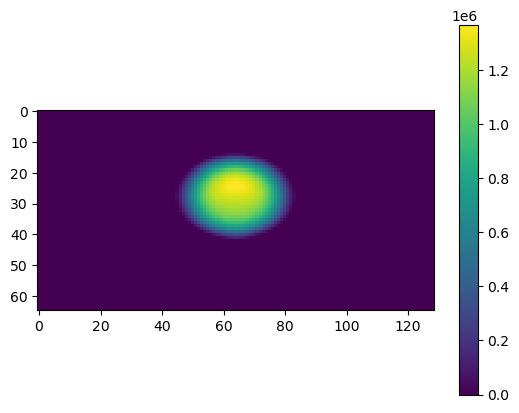

In [15]:
plt.imshow(profiles.jtor)
plt.colorbar()

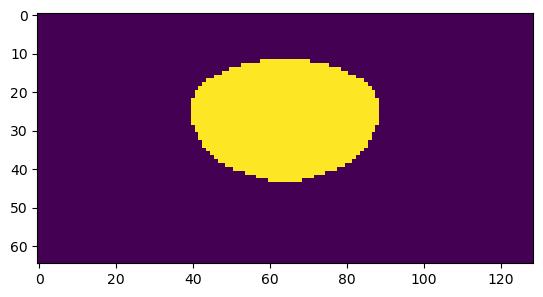

In [12]:
plt.imshow(profiles.limiter_core_mask)

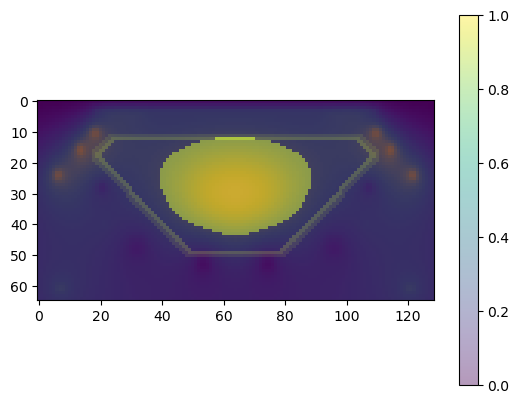

In [13]:
plt.imshow(psi)
plt.imshow(profiles.limiter_mask_out,alpha=.2)
plt.imshow(profiles.limiter_mask_in,alpha=.3)
plt.imshow(profiles.limiter_core_mask,alpha=.4)
plt.colorbar()

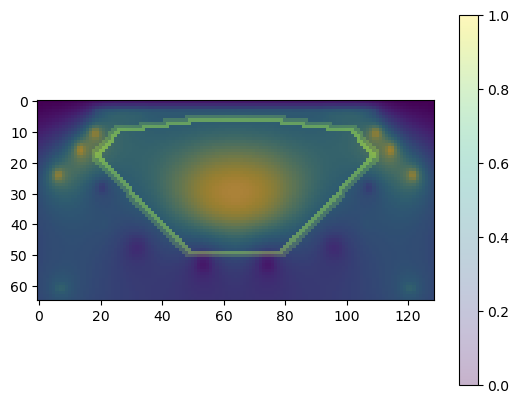

In [9]:
plt.imshow(psi)
plt.imshow(profiles.limiter_mask_out,alpha=.2)
plt.imshow(profiles.limiter_mask_in,alpha=.3)

plt.colorbar()

In [24]:
jtor = 1.0*profiles.jtor

In [8]:
psi = eq.plasma_psi + eq.tokamak.calcPsiFromGreens(pgreen=eq._pgreen)

In [8]:
print(profiles.diverted_core_mask)

None


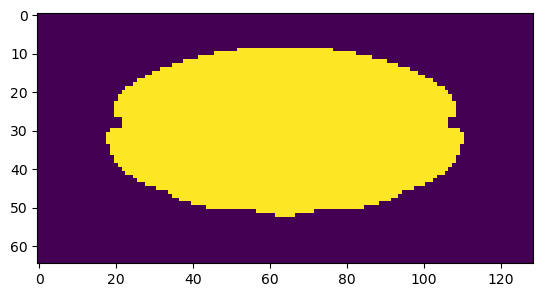

In [16]:
plt.imshow(profiles.diver)

In [30]:
critical.core_mask_limiter(psi, eq.psi_bndry,
                           jtor>0, profiles.limiter_mask_out, profiles.limiter_mask_in, )

(0.12613390588730966,
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 True)

In [12]:
from freegs import critical

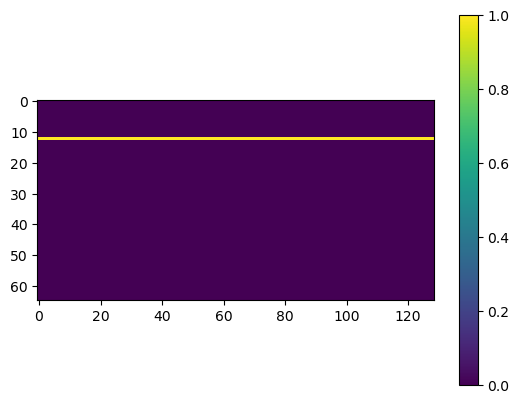

In [11]:
# plt.imshow(profiles.limiter_mask_out)
plt.imshow(profiles.limiter_mask_in)
plt.colorbar()

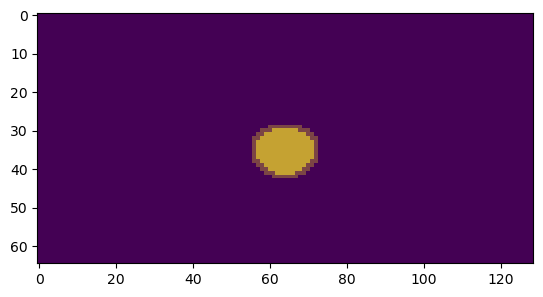

In [33]:
plt.imshow(eq.plasma_psi>.13)
plt.imshow(mask, alpha=.3)

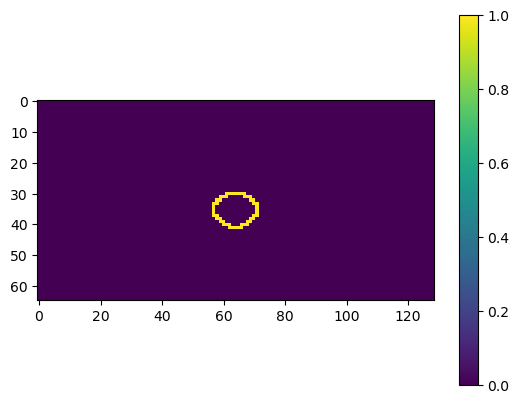

In [40]:
# plt.imshow(eq.plasma_psi<.13)
plt.imshow(mask_n)
plt.colorbar()

In [42]:
(eq.R>.45) * (eq.Z>1.45)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

In [28]:
mm = np.amax(eq.plasma_psi[eq.R<.55])

In [29]:
np.where(eq.plasma_psi==mm)

(array([15]), array([64]))

In [30]:
eq.plasma_psi[15,64]

0.05669833679385263

In [23]:
eq.plasma_psi[eq.plasma_psi>.13]

array([0.13029386, 0.13099024, 0.13140806, 0.13154732, 0.13140806,
       0.13099024, 0.13029386, 0.1304177 , 0.13170476, 0.13270682,
       0.13342294, 0.13385271, 0.13399597, 0.13385271, 0.13342294,
       0.13270682, 0.13170476, 0.1304177 , 0.13068836, 0.1322992 ,
       0.1336204 , 0.13464968, 0.1353856 , 0.1358274 , 0.13597471,
       0.1358274 , 0.1353856 , 0.13464968, 0.1336204 , 0.1322992 ,
       0.13068836, 0.13010072, 0.13204128, 0.13369096, 0.13504535,
       0.13610133, 0.13685683, 0.13731058, 0.1374619 , 0.13731058,
       0.13685683, 0.13610133, 0.13504535, 0.13369096, 0.13204128,
       0.13010072, 0.13090966, 0.13289003, 0.13457592, 0.13596173,
       0.13704329, 0.13781769, 0.13828304, 0.13843827, 0.13828304,
       0.13781769, 0.13704329, 0.13596173, 0.13457592, 0.13289003,
       0.13090966, 0.13120898, 0.13322378, 0.1349419 , 0.13635627,
       0.13746146, 0.13825353, 0.1387298 , 0.13888872, 0.1387298 ,
       0.13825353, 0.13746146, 0.13635627, 0.1349419 , 0.13322

In [31]:
def make_layer_mask(plasma_domain_mask, layer_size=3):
    """Creates a mask for the points just outside the reduced domain, with a width=`layer_size`

    Parameters
    ----------
    layer_size : int, optional
        Width of the layer outside the limiter, by default 3

    Returns
    -------
    layer_mask : np.ndarray
        Mask of the points outside the limiter within a distance of `layer_size` from the limiter
    """
    nx, ny = np.shape(plasma_domain_mask)
    layer_mask = np.zeros(np.array([nx, ny]) + 2*np.array([layer_size, layer_size]))

    for i in np.arange(-layer_size, layer_size+1)+layer_size:
        for j in np.arange(-layer_size, layer_size+1)+layer_size:
            layer_mask[i:i+nx, j:j+ny] += plasma_domain_mask
    layer_mask = layer_mask[layer_size:layer_size+nx, layer_size:layer_size+ny]
    layer_mask *= (1-plasma_domain_mask)
    layer_mask = (layer_mask>0).astype(bool)
    return layer_mask

In [34]:
mask_n = make_layer_mask(eq.plasma_psi<.13, 1)

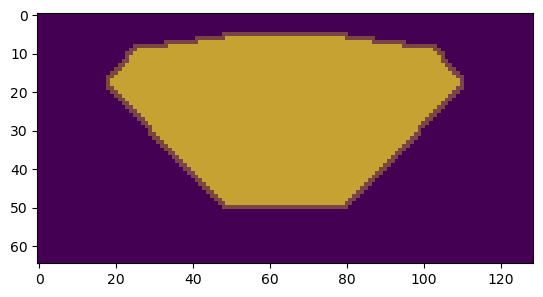

In [17]:
plt.imshow(stepping.plasma_grids.plasma_domain_mask)
plt.imshow(stepping.plasma_grids.layer_mask, alpha=.3)

In [5]:
plt.eq.R<.45

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [23]:
# Initialize the evolution object
# This uses the starting equilibrium to get all the geometric constraints/grids etc
from freegsnke import nonlinear_solve
stepping = nonlinear_solve.nl_solver(profiles=profiles, eq=eq, 
                                         max_mode_frequency=10**2.5, 
                                         full_timestep=2e-4, 
                                         max_internal_timestep=1e-3,
                                         plasma_resistivity=5e-7,
                                         plasma_domain_mask=None,
                                         automatic_timestep=(1/100, 1/10),
                                         mode_removal=True,
                                         min_dIy_dI=1,
                                         )

# In absence of a policy, this calculates the active voltages U_active
# to maintain the currents needed for the equilibrium statically
U_active = (stepping.vessel_currents_vec*stepping.evol_metal_curr.R)[:stepping.evol_metal_curr.n_active_coils]

Input max_mode_frequency corresponds to  29  independent vessel normal modes in addition to the  12  active coils.
I'm building the linearization. This might take a minute or two.
0 deltaI =  3.1149579566693895 norm(deltaIy) = 9.990615528284188
1 deltaI =  2.040564114478971 norm(deltaIy) = 10.002774102636108
2 deltaI =  1.8143657390157548 norm(deltaIy) = 10.00053968907754
3 deltaI =  1.61972204314577 norm(deltaIy) = 9.999211862446993
4 deltaI =  1.357192794752023 norm(deltaIy) = 9.997992059723025
5 deltaI =  0.6250199780590272 norm(deltaIy) = 9.999645812993696
6 deltaI =  0.5978387364681004 norm(deltaIy) = 9.998816080630304
7 deltaI =  0.4669258074997204 norm(deltaIy) = 10.000390222038439
8 deltaI =  0.4358746731883331 norm(deltaIy) = 10.000885759672729
9 deltaI =  0.1244939011008935 norm(deltaIy) = 10.02485472349709
10 deltaI =  0.07055571404495538 norm(deltaIy) = 10.08750787149454
11 deltaI =  0.09400745317727435 norm(deltaIy) = 9.973191090727893
12 deltaI =  0.4966307837732413 norm(

'Step: 39/39'

'current time t = 0.0691400900123532'

'current time step dt = 0.0017728228208295689'

starting: curr residual 279.7728764227964 12.822480459365195
[0, 'psi cycle skipped', 0, 'times, psi_residual', 8.810041032878408e-05]
[0, 'intermediate curr residual', 279.7728764227964, 12.822480459365195]
[0, 'curr_coeffs = ', array([1.39221046])]
[0, 'full cycle curr residual', 0.5598014456950496, 0.1421420022411406]
[0, 'GS residual: ', 0.09184173714041564]
[1, 'psi cycle skipped', 1, 'times, psi_residual', 3.586688420416519e-05]
[1, 'intermediate curr residual', 2.904446263923433, 0.5544716466829144]
[1, 'curr_coeffs = ', array([1.09359998])]
[1, 'full cycle curr residual', 0.05758144959949543, 0.009901589564702051]
[1, 'GS residual: ', 0.04572935482193931]
[2, 'psi cycle skipped', 2, 'times, psi_residual', 1.9351923192552093e-05]
[2, 'psi_coeffs = ', array([ 0.28677348, -0.37127082])]
[2, 'intermediate curr residual', 4.909872933397839, 0.6211589495820915]
[2, 'curr_coeffs = ', array([1.05928205])]
[2, 'full cycle curr residual', 1.881432758236134, 0.12052292415652274]
[2, 'GS r

Text(0, 0.5, 'Plasma elongation')

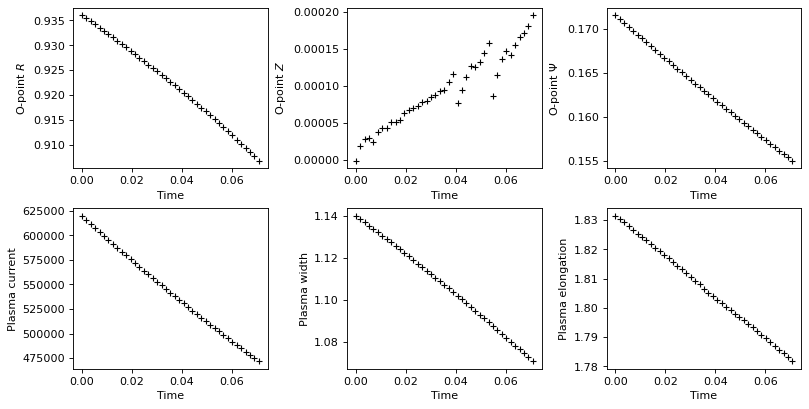

In [24]:
# Example of evolution with constant applied voltages
t = 0
flag = 0
history_times = [t]
t_per_step = []


#use the following to reset stepping.eq1 to a new IC
stepping.initialize_from_ICs(eq, profiles,
                            )
                            #  noise_level=.001, 
                            #  noise_vec=None,
                            #  update_linearization=False,
                            #  update_n_steps=12,
                            #  threshold_svd=.15)
# eqs = deepcopy(stepping.eq1)

history_currents = [stepping.currents_vec]
history_equilibria = [deepcopy(stepping.eq1)]
shapes = faster_shape.shapes_f(stepping.eq1, stepping.profiles1)
history_width = [shapes[0]]
history_o_points = shapes[1]
history_elongation = [shapes[2]]
# history_dJs = [stepping.dJ]

counter = 0
max_count = 40
while flag<1 and counter<max_count:
    clear_output(wait=True)
    display(f'Step: {counter}/{max_count-1}')
    display(f'current time t = {t}')
    display(f'current time step dt = {stepping.dt_step}')
    
    t_start = time.time()

    flag = stepping.nlstepper(active_voltage_vec=U_active, 
                                        target_relative_tol_currents=.01,
                                        target_relative_tol_GS=.01,
                                        # working_relative_tol_GS=.002,
                                        # target_relative_unexplained_residual=.5,
                                        # max_n_directions=3,
                                        # max_Arnoldi_iterations=3,
                                        # max_collinearity=.3,
                                        # step_size_psi=2.,
                                        # step_size_curr=.8,
                                        # scaling_with_n=0,
                                        # relative_tol_for_nk_psi=.002,
                                        # blend_GS=.5,
                                        # blend_psi=1,
                                        # curr_eps=1e-8,
                                        # max_no_NK_psi=1.,
                                        # clip=5,
                                        # threshold=1.5,
                                        # clip_hard=1.5,
                                        verbose=True,
                                        linear_only=False)       

   
    t_end = time.time()
    t_per_step.append(t_end-t_start)

    t += stepping.dt_step
    history_times.append(t)
    shapes = faster_shape.shapes_f(stepping.eq2, stepping.profiles2)

    history_currents.append(stepping.currents_vec)
    history_equilibria.append(deepcopy(stepping.eq2))
    history_width.append(shapes[0])
    history_o_points = np.append(history_o_points,shapes[1], axis=0)
    history_elongation.append(shapes[2])
    # history_dJs.append(stepping.dJ)
    counter += 1

history_currents = np.array(history_currents)
history_times = np.array(history_times)
history_o_points = np.array(history_o_points)


# Evolution of tracked values
fig, axs = plt.subplots(2, 3, figsize=(10, 5), dpi=80, constrained_layout=True)
axs_flat = axs.flat

axs_flat[0].plot(history_times, history_o_points[:, 0],'k+')
axs_flat[0].set_xlabel('Time')
axs_flat[0].set_ylabel('O-point $R$')

axs_flat[1].plot(history_times, history_o_points[:, 1],'k+')
axs_flat[1].set_xlabel('Time')
axs_flat[1].set_ylabel('O-point $Z$')

axs_flat[2].plot(history_times, history_o_points[:, 2],'k+')
axs_flat[2].set_xlabel('Time')
axs_flat[2].set_ylabel('O-point $\Psi$')

axs_flat[3].plot(history_times, history_currents[:,-1]*stepping.plasma_norm_factor,'k+')
axs_flat[3].set_xlabel('Time')
axs_flat[3].set_ylabel('Plasma current')

axs_flat[4].plot(history_times, history_width,'k+')
axs_flat[4].set_xlabel('Time')
axs_flat[4].set_ylabel('Plasma width')

axs_flat[5].plot(history_times, history_elongation,'k+')
axs_flat[5].set_xlabel('Time')
axs_flat[5].set_ylabel('Plasma elongation')

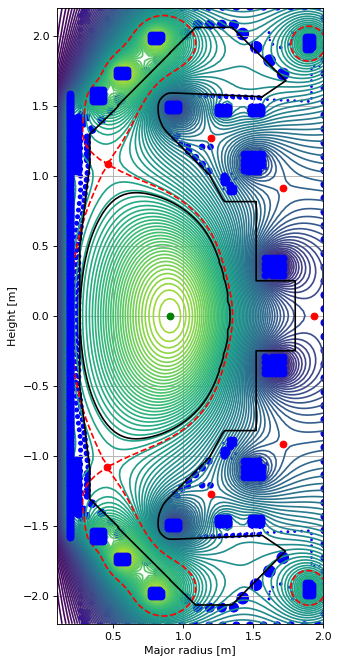

In [25]:
fig = plt.figure(figsize=(5, 10), dpi=80);
ax = fig.add_subplot(111);
ax.grid(True,which='both');
history_equilibria[-1].plot(axis=ax,show=False);
eq.tokamak.plot(axis=ax,show=False);